In [1]:
import scanpy as sc
import pickle as pkl

In [4]:
with open('/dfs/project/perturb-gnn/datasets/Horlbeck2018/GI_data_horlbeck_jurkat.pkl', 'rb') as f:
    loaded = pkl.load(f)

In [7]:
loaded.keys()

dict_keys(['good_phen', 'good_emap', 'Z-phen', 'Z_emap', 'side', 'fitness_mapper_gene', 'good_perturbations', 'good_genes'])

In [10]:
loaded['good_phen'].max()

SNRNP200   -0.076874
CARS       -0.066137
PNN        -0.074063
RBFA       -0.057364
MRPL43     -0.052291
              ...   
SNRPD3      0.028679
EIF2B2     -0.208561
BNIP1      -0.084084
ACTL6A     -0.092531
GFER       -0.236511
Length: 438, dtype: object

In [16]:
import matplotlib.pyplot as plt

(array([8.0000e+00, 2.4200e+02, 3.2850e+03, 1.6016e+04, 2.6183e+04,
        3.6595e+04, 5.3653e+04, 4.3694e+04, 1.2006e+04, 1.6200e+02]),
 array([-0.783228195, -0.6911643476666667, -0.5991005003333333,
        -0.507036653, -0.41497280566666667, -0.32290895833333333,
        -0.23084511100000005, -0.13878126366666665, -0.04671741633333337,
        0.04534643099999991, 0.13741027833333333], dtype=object),
 <BarContainer object of 10 artists>)

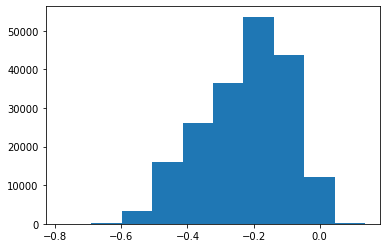

In [17]:
plt.hist(loaded['good_phen'].values.flatten())

In [18]:
with open('/dfs/user/yhr/gears2/GI_data.pkl', 'rb') as f:
    loaded2 = pkl.load(f)

(array([  70.,  936., 1761., 1661., 1522., 1223.,  658.,  406.,  184.,
          43.]),
 array([-0.7487417 , -0.65225457, -0.55576744, -0.45928031, -0.36279318,
        -0.26630605, -0.16981892, -0.07333179,  0.02315534,  0.11964247,
         0.2161296 ]),
 <BarContainer object of 10 artists>)

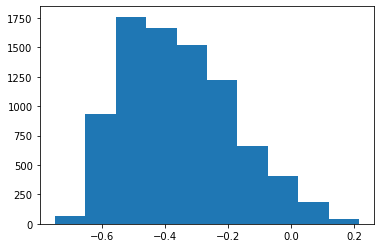

In [19]:
plt.hist(loaded2['good_phen'].values.flatten())

(array([4.000e+00, 9.000e+00, 2.800e+01, 1.240e+02, 6.470e+02, 4.155e+03,
        3.073e+03, 3.620e+02, 4.900e+01, 1.300e+01]),
 array([-17.37367685, -14.39188409, -11.41009132,  -8.42829855,
         -5.44650579,  -2.46471302,   0.51707975,   3.49887252,
          6.48066528,   9.46245805,  12.44425082]),
 <BarContainer object of 10 artists>)

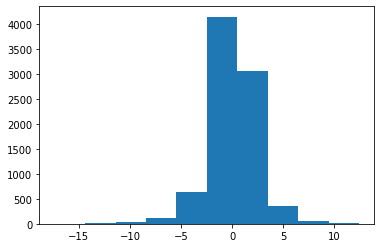

In [21]:
plt.hist(loaded2['good_emap'].values.flatten())

In [23]:
import numpy as np

In [28]:
all_vals = loaded2['good_emap'].values.flatten()

In [29]:
mean_val = np.mean(all_vals)
std_val = np.std(all_vals)

In [33]:
hit_thresh_pos = mean_val + 2*std_val
hit_thresh_neg = mean_val - 2*std_val

In [38]:
stacked_df = loaded2['good_emap'].stack()

In [51]:
topmovers = []

topmovers.extend(stacked_df[stacked_df>hit_thresh_pos].index.values)
topmovers.extend(stacked_df[stacked_df<hit_thresh_neg].index.values)

np.save('./datasets/topmovers_NormanGI.npy', topmovers)

In [4]:
import numpy as np

In [5]:
topmovers = np.load('./datasets/topmovers_NormanGI.npy')

In [6]:
len(topmovers)

448

In [7]:
(92*92)/2

4232.0

In [8]:
450/4000

0.1125